# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL and units variables
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | axim
Processing Record 4 of Set 1 | myitkyina
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | coesfeld
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ziro
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | valdosta
Processing Record 16 of Set 1 | matagalpa
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,20.75,60,0,4.92,ZA,1675116704
1,rikitea,-23.1203,-134.9692,26.21,72,18,3.84,PF,1675116766
2,axim,4.8699,-2.2405,26.61,84,88,4.23,GH,1675116767
3,myitkyina,25.3833,97.4000,14.28,62,0,1.09,MM,1675116767
4,airai,-8.9266,125.4092,16.74,95,100,0.07,TL,1675116768


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.75,60,0,4.92,ZA,1675116704
1,rikitea,-23.1203,-134.9692,26.21,72,18,3.84,PF,1675116766
2,axim,4.8699,-2.2405,26.61,84,88,4.23,GH,1675116767
3,myitkyina,25.3833,97.4000,14.28,62,0,1.09,MM,1675116767
4,airai,-8.9266,125.4092,16.74,95,100,0.07,TL,1675116768


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

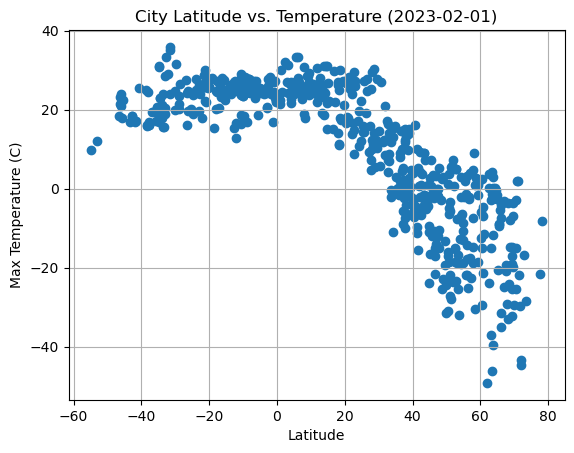

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2023-02-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

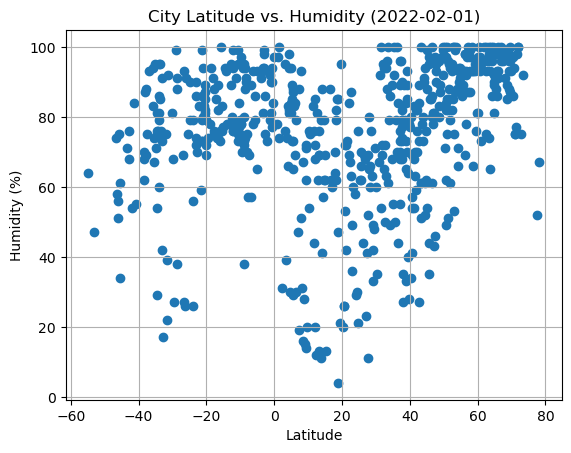

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-02-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

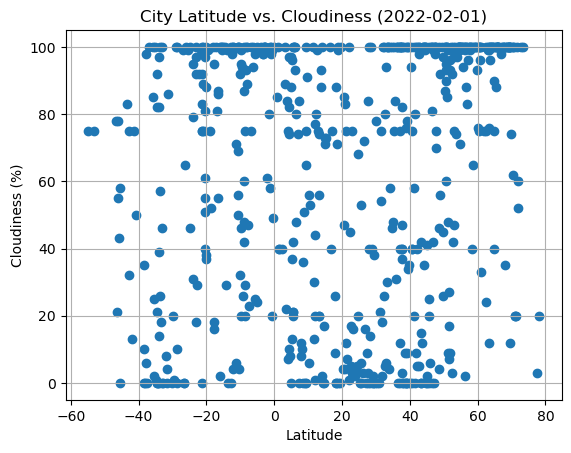

In [15]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-02-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

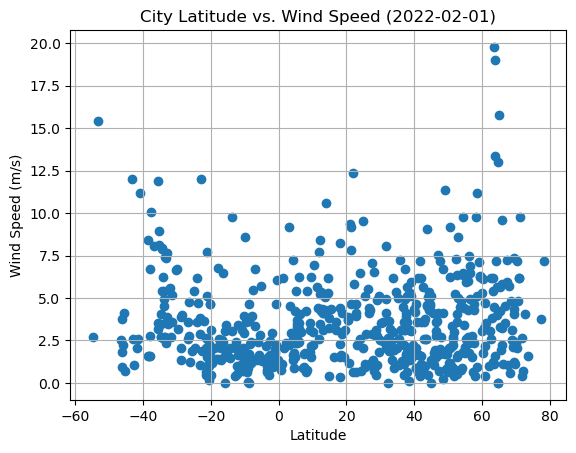

In [16]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-02-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,axim,4.8699,-2.2405,26.61,84,88,4.23,GH,1675116767
3,myitkyina,25.3833,97.4000,14.28,62,0,1.09,MM,1675116767
5,upernavik,72.7868,-56.1549,-16.90,75,100,4.04,GL,1675116768
7,coesfeld,51.9333,7.1500,5.06,79,9,5.25,DE,1675116769
8,ziro,27.6333,93.8333,4.74,69,0,1.21,IN,1675116769


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.75,60,0,4.92,ZA,1675116704
1,rikitea,-23.1203,-134.9692,26.21,72,18,3.84,PF,1675116766
4,airai,-8.9266,125.4092,16.74,95,100,0.07,TL,1675116768
6,ancud,-41.8697,-73.8203,16.81,54,13,2.05,CL,1675116768
9,puerto ayora,-0.7393,-90.3518,26.98,90,99,2.24,EC,1675116770


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Northen hemisphere latitude and temperature is -0.84


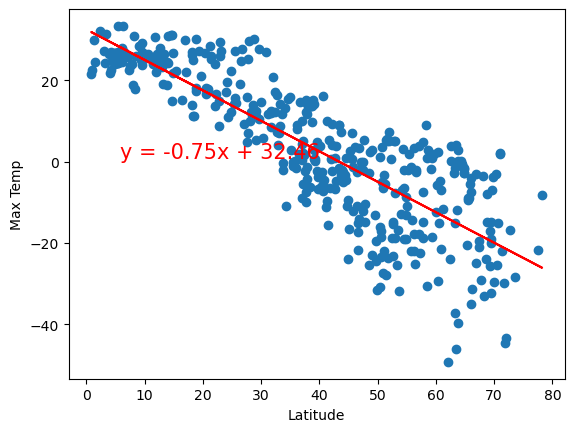

In [21]:
# Calculating the correlation coefficient between Northern Hemisphere latitude and temperature
nlat = northern_hemi_df['Lat']
ntemp = northern_hemi_df['Max Temp']

rvalue = st.pearsonr(nlat,ntemp)
print(f"The r-value between Northern hemisphere latitude and temperature is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = nlat
y_values = ntemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value between Southern hemisphere latitude and temperature is 0.37


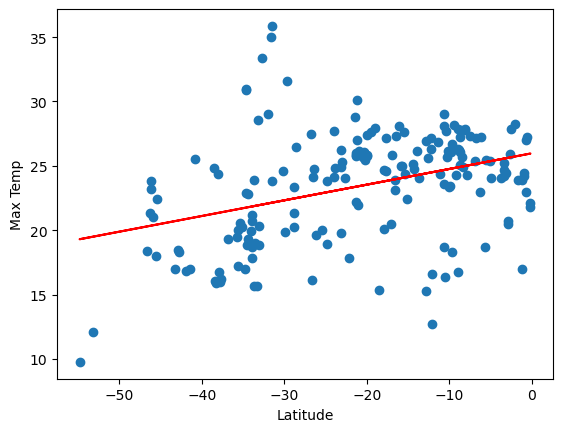

In [25]:
# Calculating the correlation coefficient between Southern Hemisphere latitude and temperature
slat = southern_hemi_df['Lat']
stemp = southern_hemi_df['Max Temp']

rvalue = st.pearsonr(slat,stemp)
print(f"The r-value between Southern hemisphere latitude and temperature is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = slat
y_values = stemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
In the Northern hemisphere we can see that there is a strong negative correlation between temperature and latitude, temperatures decrease the further away from the equator. In the Southern hemisphere, there is a weak correlation between temperatures and latitudes.

### Humidity vs. Latitude Linear Regression Plot


The r-value between Northen hemisphere latitude and humidity is 0.48


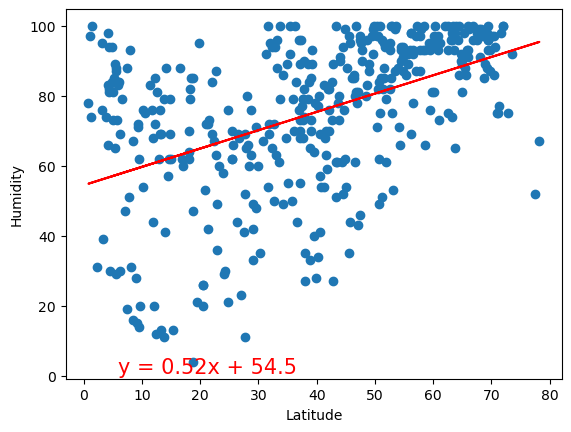

In [22]:
# Calculating the correlation coefficient between Northern Hemisphere latitude and humidity
nlat = northern_hemi_df['Lat']
nhum = northern_hemi_df['Humidity']

rvalue = st.pearsonr(nlat,nhum)
print(f"The r-value between Northern hemisphere latitude and humidity is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = nlat
y_values = nhum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value between Southern hemisphere latitude and humidity is 0.39


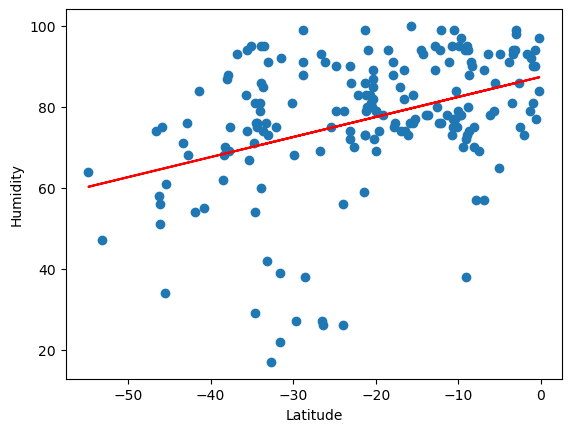

In [26]:
# Calculating the correlation coefficient between Southern Hemisphere latitude and temperature
slat = southern_hemi_df['Lat']
shum = southern_hemi_df['Humidity']

rvalue = st.pearsonr(slat,shum)
print(f"The r-value between Southern hemisphere latitude and humidity is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = slat
y_values = shum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


**Discussion about the linear relationship:** When it comes to Humidity there is a weak positive correlation between Humidity levels and latitudes, whether in the Northern or Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Northern hemisphere latitude and cloudiness is 0.33


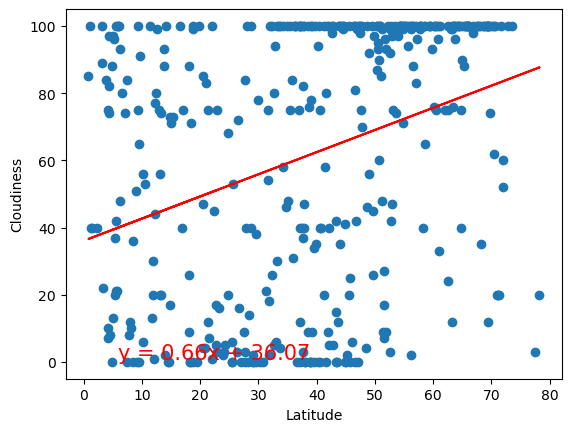

In [29]:
# Calculating the correlation coefficient between Northern Hemisphere latitude and cloudiness
nlat = northern_hemi_df['Lat']
ncloud = northern_hemi_df['Cloudiness']

rvalue = st.pearsonr(nlat,ncloud)
print(f"The r-value between Northern hemisphere latitude and cloudiness is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = nlat
y_values = ncloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value between Southern hemisphere latitude and cloudiness is 0.33


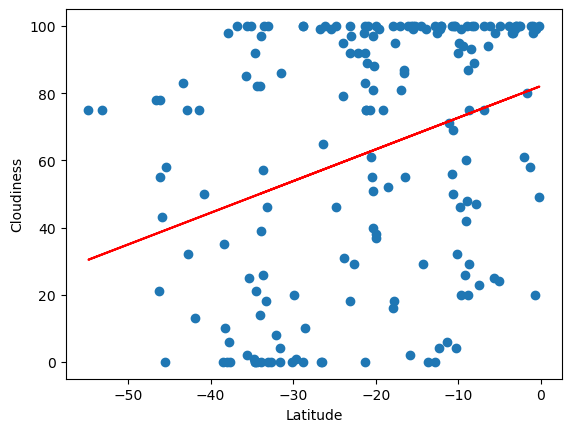

In [30]:
# Calculating the correlation coefficient between Southern Hemisphere latitude and cloudiness
slat = southern_hemi_df['Lat']
scloud = southern_hemi_df['Cloudiness']

rvalue = st.pearsonr(slat,scloud)
print(f"The r-value between Southern hemisphere latitude and cloudiness is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = slat
y_values = scloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Similarly, when it comes to Cloudiness there is a weak positive correlation between cloudiness and latitudes, whether in the Northern or Southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Northern hemisphere latitude and wind speed is 0.1


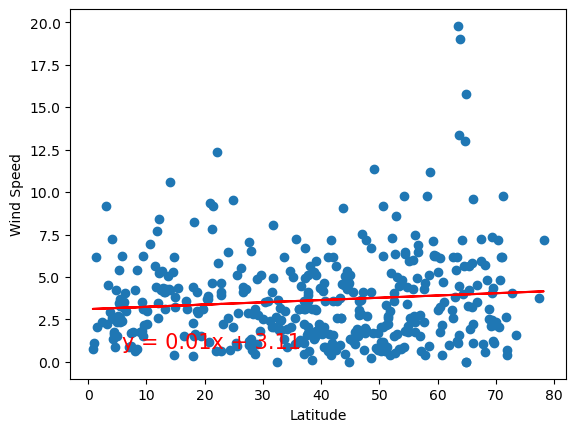

In [28]:
# Calculating the correlation coefficient between Northern Hemisphere latitude and wind speed
nlat = northern_hemi_df['Lat']
nwind = northern_hemi_df['Wind Speed']

rvalue = st.pearsonr(nlat,nwind)
print(f"The r-value between Northern hemisphere latitude and wind speed is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = nlat
y_values = nwind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.062239040700515696


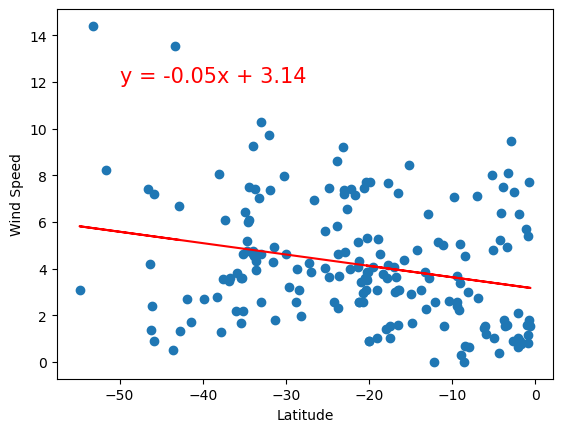

In [22]:
# Calculating the correlation coefficient between Southern Hemisphere latitude and temperature
slat = southern_hemi_df['Lat']
swind = southern_hemi_df['Wind Speed']

rvalue = st.pearsonr(slat,swind)
print(f"The r-value between Southern hemisphere latitude and wind speed is {round(rvalue[0],2)}")

# Add the linear regression equation and line to plot

x_values = slat
y_values = swind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Finally our analysis depicted very weak to no correlation between wind speeds and proximity to the equator.